In [1]:
import logging
from typing import List, Callable, Optional, Any

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.decomposition import PCA


from pynamics import downsample, downsample_split, avg_over, get_attractor_dimension
from pynamics.utils import np_cache, eigsort

from randnn import GaussianNN, SparseRandNN, scaling_analysis
from hoogland_masters.plotting import *


rc('text', usetex=True)
logging.basicConfig(level=logging.INFO)

# Generating random continuous-rate neural networks

First, we want to make sure that we're correctly creating our random neural networks. 

### Parameters
Change the following parameters to play with generated neural networks.

In [2]:
# Main parameters:
COUPLING_STRENGTH = 10
N_NEURONS = 1000

# The remaining parameters influence temporal resolution and trajectory duration
TIMESTEP = 1e-2
N_STEPS = int(1e4)
N_BURNIN_STEPS = 500

INFO:root:Loading from save ./saves/trajectories/trajectory-b736c226869c562e317c083d5a8f6259.npy
Burning-in Osedelets matrix: 0it [00:00, ?it/s]
QR-Decomposition of trajectory:   0%|          | 0/1000 [00:00<?, ?it/s]

[[ 2.52776475 -6.76980985 -0.43975567 ... -8.15451468 -2.54341299
  -6.5142603 ]
 [ 2.60740408 -6.79358411 -0.42929453 ... -8.16880423 -2.57955758
  -6.50878407]
 [ 2.68629884 -6.81733674 -0.41768364 ... -8.18279303 -2.61723931
  -6.5028721 ]
 ...
 [-0.26394341  9.63435067 -1.14675205 ... 10.11431455 -3.64670712
   0.09499641]
 [-0.26369923  9.56581575 -1.1351345  ... 10.17465043 -3.63366986
   0.09854792]
 [-0.26454906  9.49717627 -1.12545579 ... 10.2332343  -3.62125129
   0.1015433 ]]
(10000, 1000)


QR-Decomposition of trajectory: 100%|██████████| 1000/1000 [03:02<00:00,  5.49it/s]


Attractor dimension: 99.34487975429934


/Users/Jesse/1-Projects/3-masters-thesis/masters-thesis/hoogland-masters/hoogland_masters/plotting/__init__.py:113: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((0, 0),


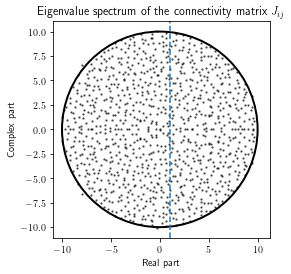

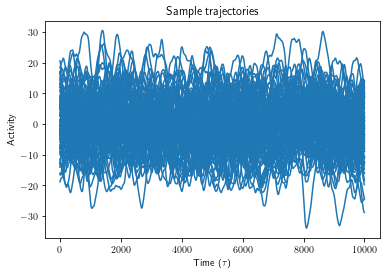

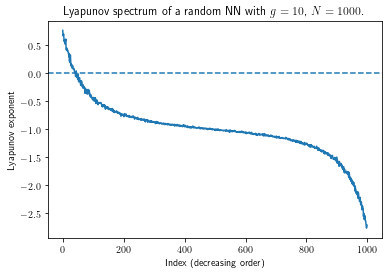

In [3]:
# Create a network
cont_nn = GaussianNN(coupling_strength=COUPLING_STRENGTH, n_dofs=N_NEURONS, timestep=TIMESTEP, network_seed=123)

# Generate a neural trajectory on this network
trajectory = cont_nn.run(n_steps=N_STEPS, n_burn_in=N_BURNIN_STEPS)

print(trajectory)
downsampled_trajectory = trajectory[::1, :]
print(downsampled_trajectory.shape)
# Calculate the lyapunov spectrum of this network
lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(downsampled_trajectory[:1000], t_ons=1e-2, save=False)


# Given the lyapunov spectrum, calculate the attractor dimension
print("Attractor dimension: {}".format(get_attractor_dimension(lyapunov_spectrum)))

##### Plot the eigenvalue spectrum and make sure it respects Girko's circular law
plot_random_matrix_spectrum(cont_nn.coupling_matrix, COUPLING_STRENGTH)
plt.show()

# Plot a few sample trajectories to get visual insight to the (non-)chaotic dynamics
plot_trajectory_samples(trajectory[:10000], 100)
plt.show()

# Plot the full lyapunov spectrum (following Engelken et al. 2020)
plot_lyapunov_spectrum(lyapunov_spectrum, title="Lyapunov spectrum of a random NN with $g={}$, $N={}$.".format(COUPLING_STRENGTH, N_NEURONS))
plt.show()


INFO:root:Loading from save ./saves/trajectories/trajectory-46d0bbd72539c53c52edc3620a848743.npy
Burning-in Osedelets matrix: 0it [00:00, ?it/s]
QR-Decomposition of trajectory: 100%|██████████| 1000/1000 [02:48<00:00,  5.92it/s]
INFO:root:Saving to ./saves/lyapunov/spectrum-a7960bbaa5b9f08837b0186bc3dbd205.npy


Attractor dimension: 100.00083675936148


/Users/Jesse/1-Projects/3-masters-thesis/masters-thesis/hoogland-masters/hoogland_masters/plotting/__init__.py:113: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((0, 0),


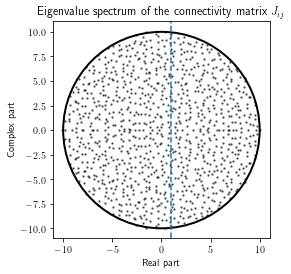

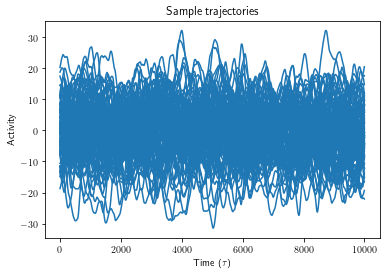

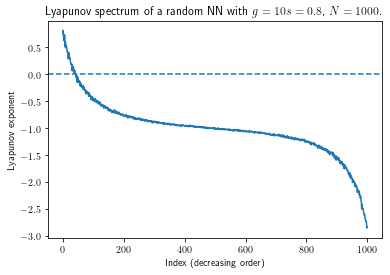

In [10]:
SPARSITY = 0.8

# Create a network
sparse_nn = SparseRandNN(coupling_strength=COUPLING_STRENGTH, sparsity=SPARSITY, n_dofs=N_NEURONS, timestep=TIMESTEP, normalize_strength=True, network_seed=123)

# Generate a neural trajectory on this network
sp_trajectory = sparse_nn.run(n_steps=N_STEPS, n_burn_in=N_BURNIN_STEPS)


# Calculate the lyapunov spectrum of this network
sp_lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(sp_trajectory[:1000], t_ons=1e-2, load=False)


# Given the lyapunov spectrum, calculate the attractor dimension
print("Attractor dimension: {}".format(get_attractor_dimension(sp_lyapunov_spectrum)))

##### Plot the eigenvalue spectrum and make sure it respects Girko's circular law
plot_random_matrix_spectrum(sparse_nn.coupling_matrix, COUPLING_STRENGTH)
plt.show()

# Plot a few sample trajectories to get visual insight to the (non-)chaotic dynamics
plot_trajectory_samples(sp_trajectory[:10000], 100)
plt.show()

# Plot the full lyapunov spectrum (following Engelken et al. 2020)
plot_lyapunov_spectrum(sp_lyapunov_spectrum, title="Lyapunov spectrum of a random NN with $g={} s={}$, $N={}$.".format(COUPLING_STRENGTH, SPARSITY, N_NEURONS))
plt.show()


In [ ]:
for t_ons in [1e-2, 1e-1, 1]:
    # Generate a neural trajectory on this network¨
    lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(downsampled_trajectory[:1000], t_ons=t_ons, save=False)


    # Plot the full lyapunov spectrum (following Engelken et al. 2020)
    plot_lyapunov_spectrum(lyapunov_spectrum, title="Lyapunov spectrum of a random NN with $g={}$, $N={}$.".format(COUPLING_STRENGTH, N_NEURONS))
    
plt.hlines(-1, 0, 1000)
plt.show()


INFO:root:Loading from save ./saves/trajectories/trajectory-cda6dda27c1f578e2cc549447c14d424.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-e8b6001e6723ff3e41281890a4509c67.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-f8e8b841294b67eccfe18867708d7eb9.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-7ee55a2ba39682a836f1756068397866.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-1f8699b0729b576b6f31cae27056c263.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-f08f08228ad48857d0df546659bf7728.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-46316667a3cb35a9f35ec160516e1e13.npy


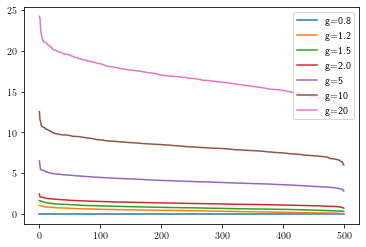

In [6]:
GS = [0.8, 1.2, 1.5, 2.0, 5, 10, 20]

def trajectory_std(trajectory, *args, **kwargs): 
    return np.sort(np.std(trajectory, axis=0))[::-1]

# Just to make sure ``plot_curves_with_g`` works
plot_curves_with_g(GS, trajectory_std, n_dofs=500, n_steps=50000)


INFO:root:Loading from save ./saves/trajectories/trajectory-cda6dda27c1f578e2cc549447c14d424.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-ae7553296eb27f2a0c8d5abf760827dc.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-e8b6001e6723ff3e41281890a4509c67.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-b25966665a6e6e0a6d62f23058d5a0d0.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-f8e8b841294b67eccfe18867708d7eb9.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-2761fa5e2d31ec20ffe0d384a786e0a3.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-7ee55a2ba39682a836f1756068397866.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-cda27fd802e27171232a0274b4c4eb78.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-1f8699b0729b576b6f31cae27056c263.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-2f0d850722b0ef91ecfacd4278e50811.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-

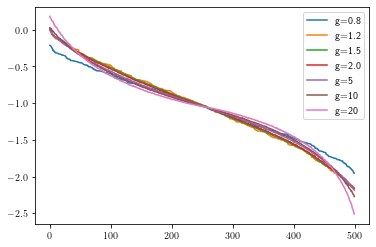

In [7]:
def get_lyapunov_spectrum(trajectory, system):
    return system.get_lyapunov_spectrum(trajectory[::10])

plot_curves_with_g(GS, get_lyapunov_spectrum, n_dofs=500, n_steps=50000)
